In [7]:
import pandas as pd
import os
import time
from datetime import datetime

from time import mktime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
style.use("dark_background")

import re
%matplotlib inline

In [9]:
def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    path = "./intraQuarter/"
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])

    sp500_df = pd.DataFrame.from_csv("YAHOO-INDEX_GSPC.csv")
    stock_df = pd.DataFrame.from_csv("stock_prices.csv")
    
    ticker_list = []
    
    print "CSVs read..."
    print "length of stock lists is ",len(stock_list)
    
    for each_dir in stock_list[1:]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split("//")[1].split("/")
        ticker_list.append(ticker)

#        starting_stock_value = False
#        starting_sp500_value = False

        
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                full_file_path = each_dir+'/'+file
                source = open(full_file_path,'r').read()
                
                try:
                    value_list = []

                    for each_data in gather:
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value = re.search(regex, source)
                            value = (value.group(1))

                            if "B" in value:
                                value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                            
                            
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)
                            

                    #sp500_price
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        #print row
                        sp500_price = float(row["Adj Close"])
                    except:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_date)]
                        #print row
                        sp500_price = float(row["Adj Close"])
                    
                    one_year_later = int(unix_time+31536000)
                    
                    print "1 yr later"
                    
                    #sp500_1y_price
                    try:
                        sp500_1y_date = datetime.fromtimestamp(one_year_later).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == sp500_1y_date)]
                        #print row
                        sp500_1y_price = float(row["Adj Close"])
                    except:
                        try:
                            sp500_1y_date = datetime.fromtimestamp(one_year_later-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == sp500_1y_date)]
                            #print row
                            sp500_1y_price = float(row["Adj Close"])
                        except Exception as e:
                            print "bakwas!"
                            
                    #stock_1yr_price
                    try:
                        stock_price_1y_date = datetime.fromtimestamp(one_year_later).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == stock_price_1y_date)]
                        stock_1y_price = float(row["Adj Close"])
                    except Exception as e:
                        try:
                            stock_price_1y_date = datetime.fromtimestamp(one_year_later-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == stock_price_1y_date)]
                            stock_1y_price = float(row["Adj Close"])
                        except Exception as e:
                            print ("Stock price exception:",str(e))
                            

                    print "somewhere here"       
                    
                    #stock_price
                    try:
                        stock_price_time = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row = sp500_df[(sp500_df.index == stock_price_time)]
                        stock_price = float(row["Adj Close"])
                    except Exception as e:
                        try:
                            stock_price_time = datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row = sp500_df[(sp500_df.index == stock_price_time)]
                            stock_price = float(row["Adj Close"])
                        except Exception as e:
                            print ("Stock price exception2:",str(e))
                    

                    stock_p_change = round((((stock_1y_price - stock_price) / stock_price) * 100),2)
                    sp500_p_change = round((((sp500_1y_price - sp500_price) / sp500_price) * 100),2)
                    
                    
                    
                    difference = stock_p_change-sp500_p_change
                    
                    print "calculating difference..."
                    if difference > 0:
                        status = "outperform"
                    else:
                        status = "underperform"


                    if value_list.count("N/A") > 0:
                        pass
                    else:
                        

                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_price,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                except Exception as e:
                    print e
                    pass


    df.to_csv("key_stats_acc_perf_NO_NA.csv")
                

CSVs read...
length of stock lists is  561
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere here
calculating difference...
1 yr later
somewhere 

/home/markroxor/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


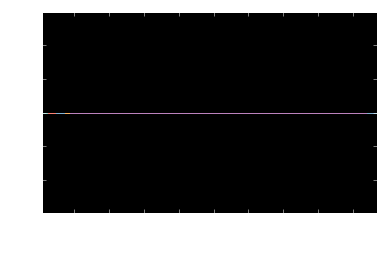

In [10]:
Key_Stats()